In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams.update({
    "figure.dpi": 600,
    "figure.figsize": (6, 2.5),
    "font.size": 8,
    "mathtext.fontset": "stix"
})


In [2]:
# Load vmem simulation data
base_dir = '/Users/susannedahle/CellTypeDependenceElStim/simulation_data/vmem_data_neo' 

plot_vmem_file_paths = [
    os.path.join(base_dir, f'plot_data_neo_{i}.npy')
    for i in range(16)
]


vmem_amp_file_paths = [
    os.path.join(base_dir, f'vmem_amp_data_neo_Ez_{i}.npy')
    for i in range(16)
]

vmem_amp_data_list = [
    np.load(path, allow_pickle=True).item()
    for path in vmem_amp_file_paths
]
vmem_amp_data = {}
for data in vmem_amp_data_list:
    vmem_amp_data.update(data)

In [3]:
# PLOT DATA
def load_cell_data_from_files(plot_file_paths, selected_cells):
    """Loads data for the selected cells from multiple .npy files. Ensures effective loading without using too much RAM"""
    data = {}
    
    for file_path in plot_file_paths:
        temp_data = np.load(file_path, allow_pickle=True).item()  # Load the .npy dictionary
        
        for cell in selected_cells:
            if cell in temp_data:
                data[cell] = temp_data[cell]  # Store only required cell data

        # Stop early if all selected cells have been found
        if len(data) == len(selected_cells):
            break  

    return data

In [4]:
sorted_all_neurons_highest_mean_soma_amp = []
sorted_pc_cells_highest_mean_soma_amp = []
sorted_ss_cells_highest_mean_soma_amp = []
sorted_inhb_cells_highest_mean_soma_amp = []

sorted_all_neurons_highest_soma_amp_1000Hz = []
sorted_pc_cells_highest_soma_amp_1000Hz = []
sorted_ss_cells_highest_soma_amp_1000Hz = []
sorted_inhb_cells_highest_soma_amp_1000Hz = []

sorted_all_neurons_highest_soma_amp_10Hz = []
sorted_pc_cells_highest_soma_amp_10Hz = []
sorted_ss_cells_highest_soma_amp_10Hz = []
sorted_inhb_cells_highest_soma_amp_10Hz = []

def sort_neurons(amp_data):
    """Sort neurons based on Vm amplitude in soma, and separate based on cell-type. Sorts based on average for all frequencies, values at 10 Hz and 1000 Hz"""
    global sorted_all_neurons_highest_mean_soma_amp, sorted_pc_cells_highest_mean_soma_amp, sorted_ss_cells_highest_mean_soma_amp, sorted_inhb_cells_highest_mean_soma_amp
    global sorted_all_neurons_highest_soma_amp_1000Hz, sorted_pc_cells_highest_soma_amp_1000Hz, sorted_ss_cells_highest_soma_amp_1000Hz, sorted_inhb_cells_highest_soma_amp_1000Hz
    global sorted_all_neurons_highest_soma_amp_10Hz, sorted_pc_cells_highest_soma_amp_10Hz, sorted_ss_cells_highest_soma_amp_10Hz, sorted_inhb_cells_highest_soma_amp_10Hz
    sorted_all_neurons_highest_mean_soma_amp = []
    sorted_pc_cells_highest_mean_soma_amp = []
    sorted_ss_cells_highest_mean_soma_amp = []
    sorted_inhb_cells_highest_mean_soma_amp = []    
    sorted_all_neurons_highest_soma_amp_1000Hz = []
    sorted_pc_cells_highest_soma_amp_1000Hz = []
    sorted_ss_cells_highest_soma_amp_1000Hz = []
    sorted_inhb_cells_highest_soma_amp_1000Hz = []
    sorted_all_neurons_highest_soma_amp_10Hz = []
    sorted_pc_cells_highest_soma_amp_10Hz = []
    sorted_ss_cells_highest_soma_amp_10Hz = []
    sorted_inhb_cells_highest_soma_amp_10Hz = []

    # Average soma amplitude
    mean_soma_amp = {}
    for neuron, data in amp_data.items():
        mean_soma_amp[neuron] = sum(data['soma_amp']) / len(data['soma_amp'])

    sorted_neurons = sorted(mean_soma_amp.keys(), key=lambda x: mean_soma_amp[x], reverse=True)
    for i in range(len(sorted_neurons)):
        sorted_all_neurons_highest_mean_soma_amp.append(sorted_neurons[i])

    for idx in range(len(sorted_neurons)):
        if 'PC' in sorted_neurons[idx] or 'SP' in sorted_neurons[idx]:
            sorted_pc_cells_highest_mean_soma_amp.append(sorted_neurons[idx])
        elif 'SS' in sorted_neurons[idx]:
            sorted_ss_cells_highest_mean_soma_amp.append(sorted_neurons[idx])
        else:
            sorted_inhb_cells_highest_mean_soma_amp.append(sorted_neurons[idx])

    # Soma amp high frequency 
    soma_amp_1000Hz = {}
    for neuron, data in amp_data.items():
        freq_idx = data['freq'].index(1000) 
        soma_amp_1000Hz[neuron] = data['soma_amp'][freq_idx]

    sorted_neurons_1000Hz = sorted(soma_amp_1000Hz.keys(), key=lambda x: soma_amp_1000Hz[x], reverse=True)
    for i in range(len(sorted_neurons_1000Hz)):
        sorted_all_neurons_highest_soma_amp_1000Hz.append(sorted_neurons_1000Hz[i])

    for idx in range(len(sorted_neurons_1000Hz)):
        if 'PC' in sorted_neurons_1000Hz[idx] or 'SP' in sorted_neurons_1000Hz[idx]:
            sorted_pc_cells_highest_soma_amp_1000Hz.append(sorted_neurons_1000Hz[idx])
        elif 'SS' in sorted_neurons_1000Hz[idx]:
            sorted_ss_cells_highest_soma_amp_1000Hz.append(sorted_neurons_1000Hz[idx])
        else:
            sorted_inhb_cells_highest_soma_amp_1000Hz.append(sorted_neurons_1000Hz[idx])
    
    # Soma amp low frequency 
    soma_amp_10Hz = {}
    for neuron, data in amp_data.items():
        freq_idx = data['freq'].index(10) 
        soma_amp_10Hz[neuron] = data['soma_amp'][freq_idx]

    sorted_neurons_10Hz = sorted(soma_amp_10Hz.keys(), key=lambda x: soma_amp_10Hz[x], reverse=True)
    for i in range(len(sorted_neurons_10Hz)):
        sorted_all_neurons_highest_soma_amp_10Hz.append(sorted_neurons_10Hz[i])

    for idx in range(len(sorted_neurons_10Hz)):
        if 'PC' in sorted_neurons_10Hz[idx] or 'SP' in sorted_neurons_10Hz[idx]:
            sorted_pc_cells_highest_soma_amp_10Hz.append(sorted_neurons_10Hz[idx])
        elif 'SS' in sorted_neurons_10Hz[idx]:
            sorted_ss_cells_highest_soma_amp_10Hz.append(sorted_neurons_10Hz[idx])
        else:
            sorted_inhb_cells_highest_soma_amp_10Hz.append(sorted_neurons_10Hz[idx])


In [5]:
def plot_cell_shape_and_vmem(file_paths, selected_cells, selected_frequencies=None):
    """Loads data from multiple .npy files and plots the cell-shapes and membrane potential over time. (Figures C.5-7)"""
    
    # Load only the required data
    data = load_cell_data_from_files(file_paths, selected_cells)

    if not data:
        print("No data found for the selected cells.")
        return

    # Extract unique frequencies
    stored_frequencies = sorted(set(freq for cell_data in data.values() for freq in cell_data['freq']))
    if all(value in stored_frequencies for value in selected_frequencies):
        frequencies = selected_frequencies
    else:
        print('Error! Selected frequencis not stored during simulation, plotting for stored frequencies.')
        frequencies = stored_frequencies

    n_freqs = len(frequencies)
    n_cells = len(selected_cells)

    fig, axs = plt.subplots(n_cells, n_freqs * 2, figsize=(12, 3 * n_cells), squeeze=False)
    plt.rcParams['mathtext.fontset'] = 'stix'

    for cell_idx, cell_name in enumerate(selected_cells):
        if cell_name not in data:
            continue  # Skip if the cell is not in the data

        cell_data_list = data[cell_name]

        for freq_idx, freq in enumerate(frequencies):
            if freq not in cell_data_list['freq']:
                continue  # Skip if no data for this frequency

            i = cell_data_list['freq'].index(freq)
            x = np.array(cell_data_list['x'][i])
            z = np.array(cell_data_list['z'][i])
            amplitudes = np.array(cell_data_list['amplitudes'][i])
            totnsegs = int(cell_data_list['totnsegs'][i])
            tvec = np.array(cell_data_list['tvec'][i])
            vmem = np.array(cell_data_list['vmem'][i])

            ax1 = axs[cell_idx][freq_idx * 2]
            ax2 = axs[cell_idx][freq_idx * 2 + 1]

            norm_amplitudes = (amplitudes - np.min(amplitudes)) / (np.max(amplitudes) - np.min(amplitudes))
            color_map = cm.viridis(norm_amplitudes)

            for idx in range(totnsegs):
                ax1.plot(x[idx], z[idx], c=color_map[idx], lw=2)

            ax1.plot(x.mean(axis=-1)[0], z.mean(axis=-1)[0], 'o', color='red', label="Soma")
            if cell_name == selected_cells[-1]:
                ax1.legend(bbox_to_anchor=(-0.18, -0.05), fontsize = 'x-small')

            if cell_name not in ["BnS", "TwoComp"]:
                ax1.set_aspect('equal', adjustable='box')
            ax1.set_title(f'{cell_name}', fontsize = 9)
            ax1.set_xlabel('x [µm]')
            ax1.set_ylabel('z [µm]')
            ax1.set_xlim(left=(np.min(x)-50), right=(np.max(x)+50))

            sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=np.min(amplitudes), vmax=np.max(amplitudes)))
            sm.set_array([])
            cbar = plt.colorbar(sm, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)
            cbar.set_label(r'$V_m$ Amplitude', fontsize = 12)

            ax2.plot(tvec, vmem, color='red', label='Soma $V_m$')
            ax2.set_xlabel('Time [ms]', fontsize = 12)
            ax2.set_ylabel('$V_m$ [mV]', fontsize = 12)
            ax2.legend()

    for freq_idx, freq in enumerate(frequencies):
        fig.text((freq_idx * 2 + 1) / (n_freqs * 2), 0.95, f'Frequency {freq} Hz', ha='center', fontsize=18, fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.savefig(f'/Users/susannedahle/Documents/Master/Code/Plots_artikkel/supplementary/Cell_shapes_and_vmem_{selected_cells}.png')
    plt.show()

In [6]:
sort_neurons(vmem_amp_data)

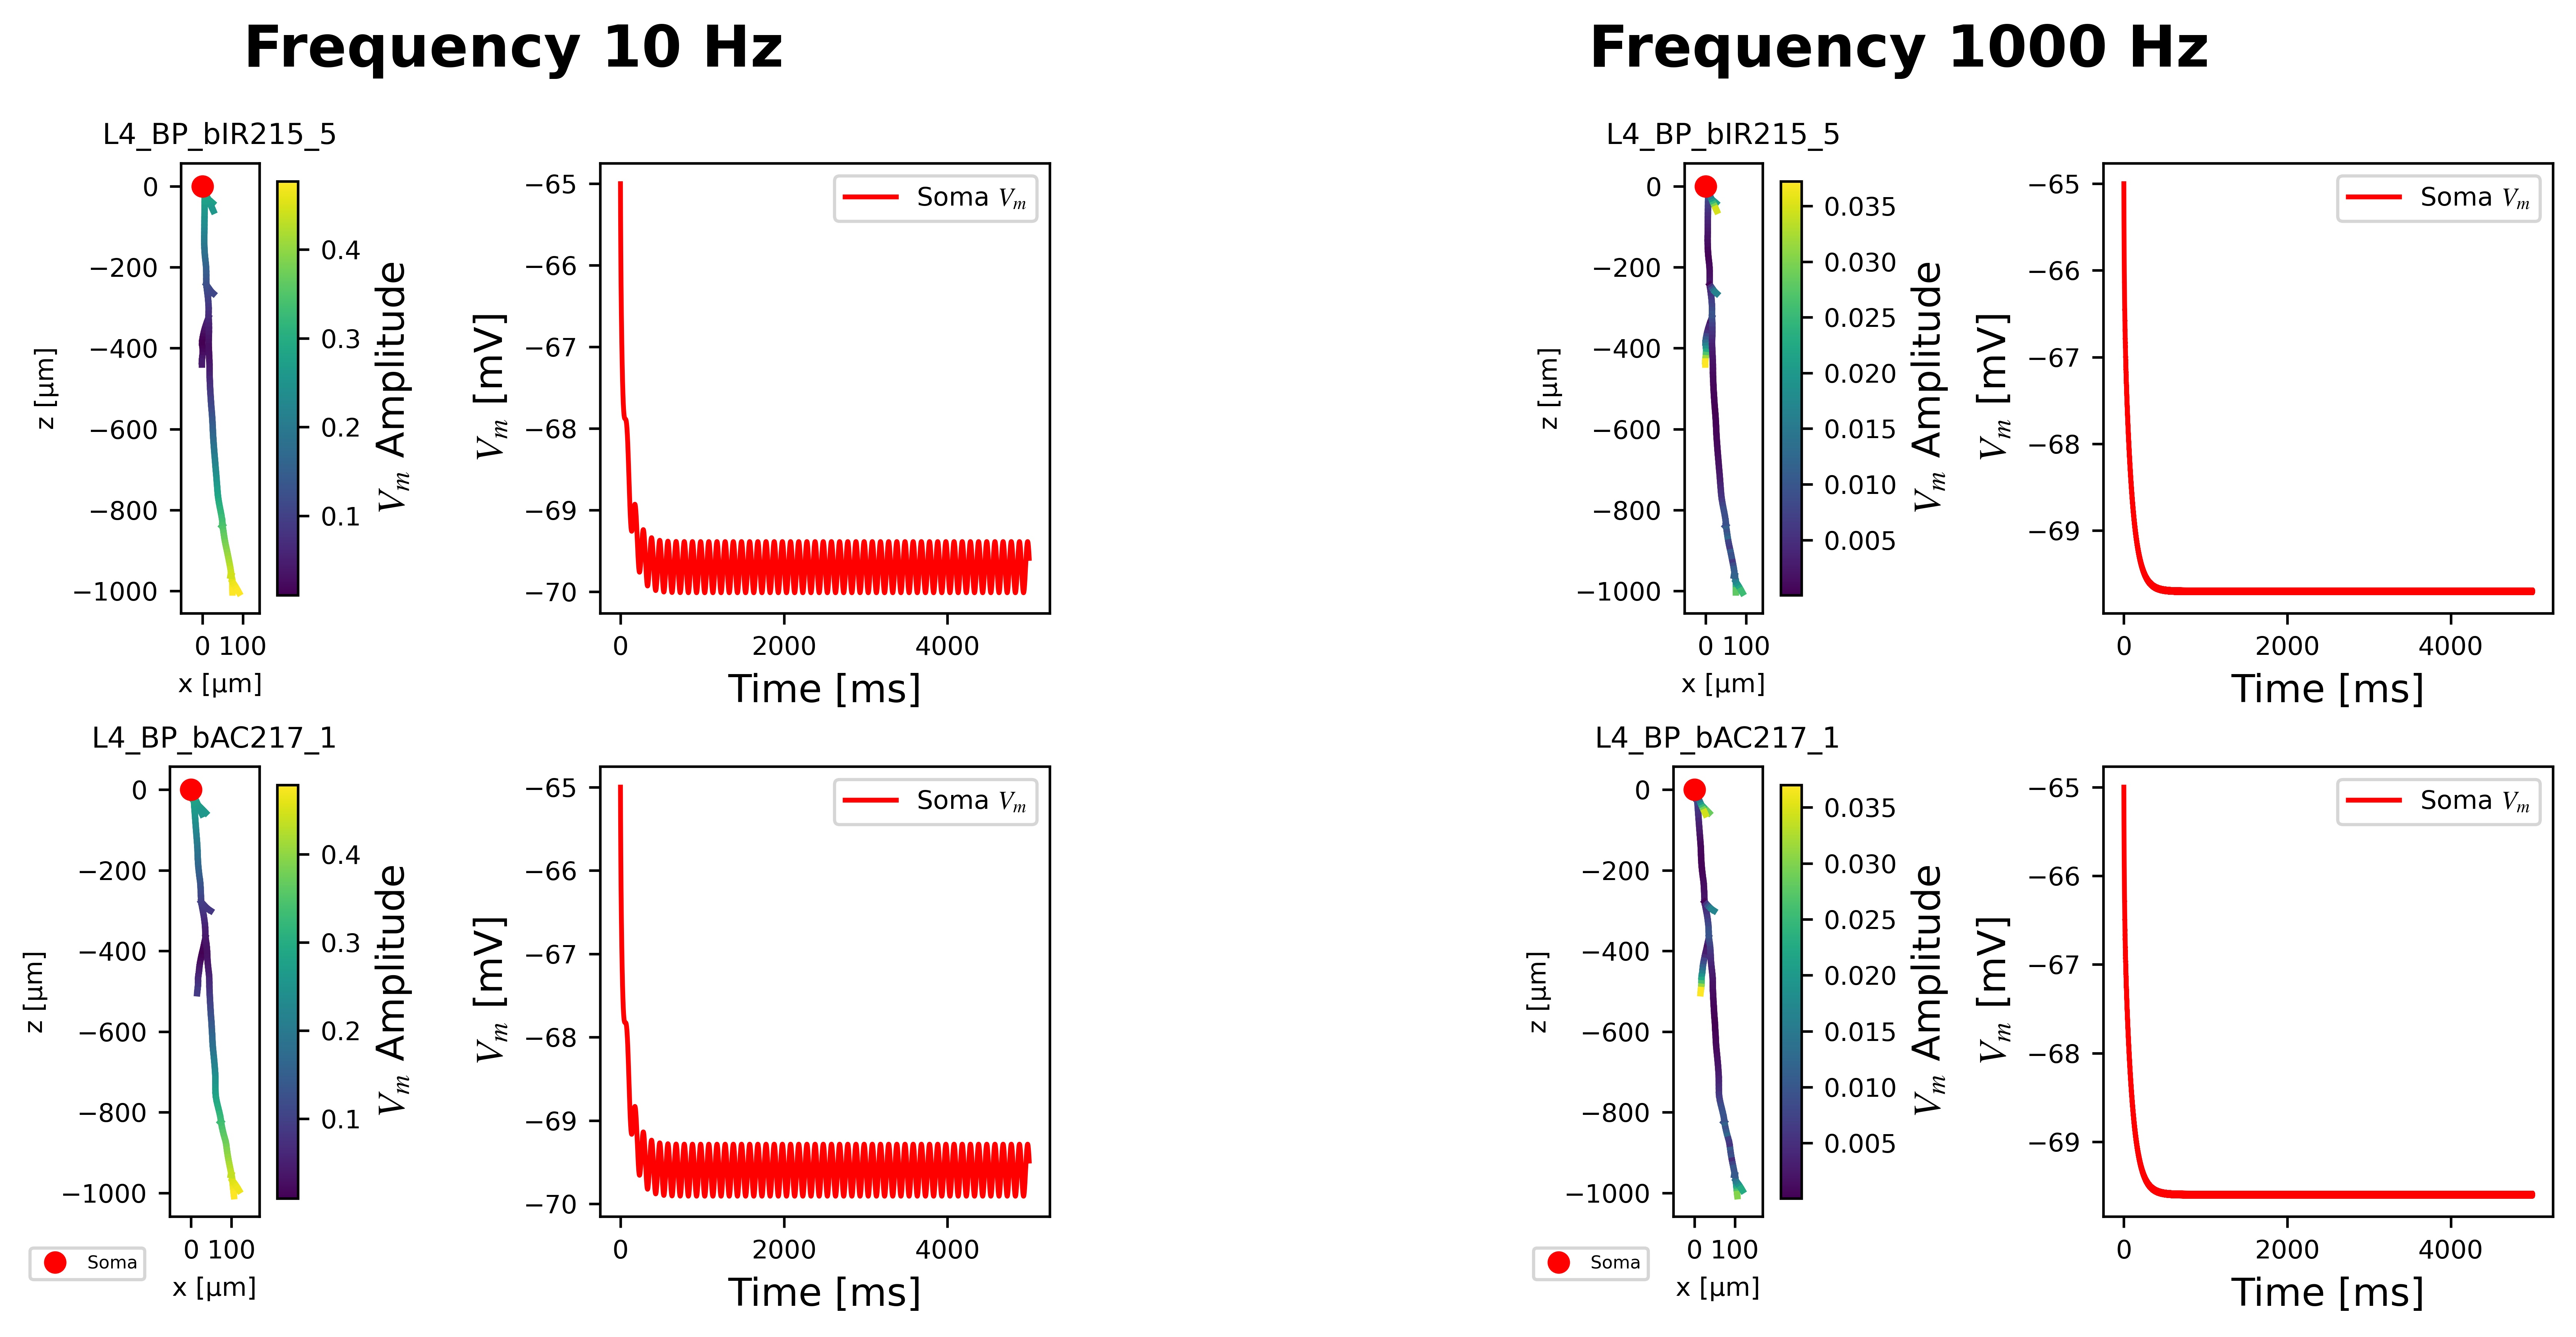

In [7]:
plot_cell_shape_and_vmem(plot_vmem_file_paths, selected_cells=sorted_all_neurons_highest_soma_amp_10Hz[0:2], selected_frequencies = [10,1000]) 

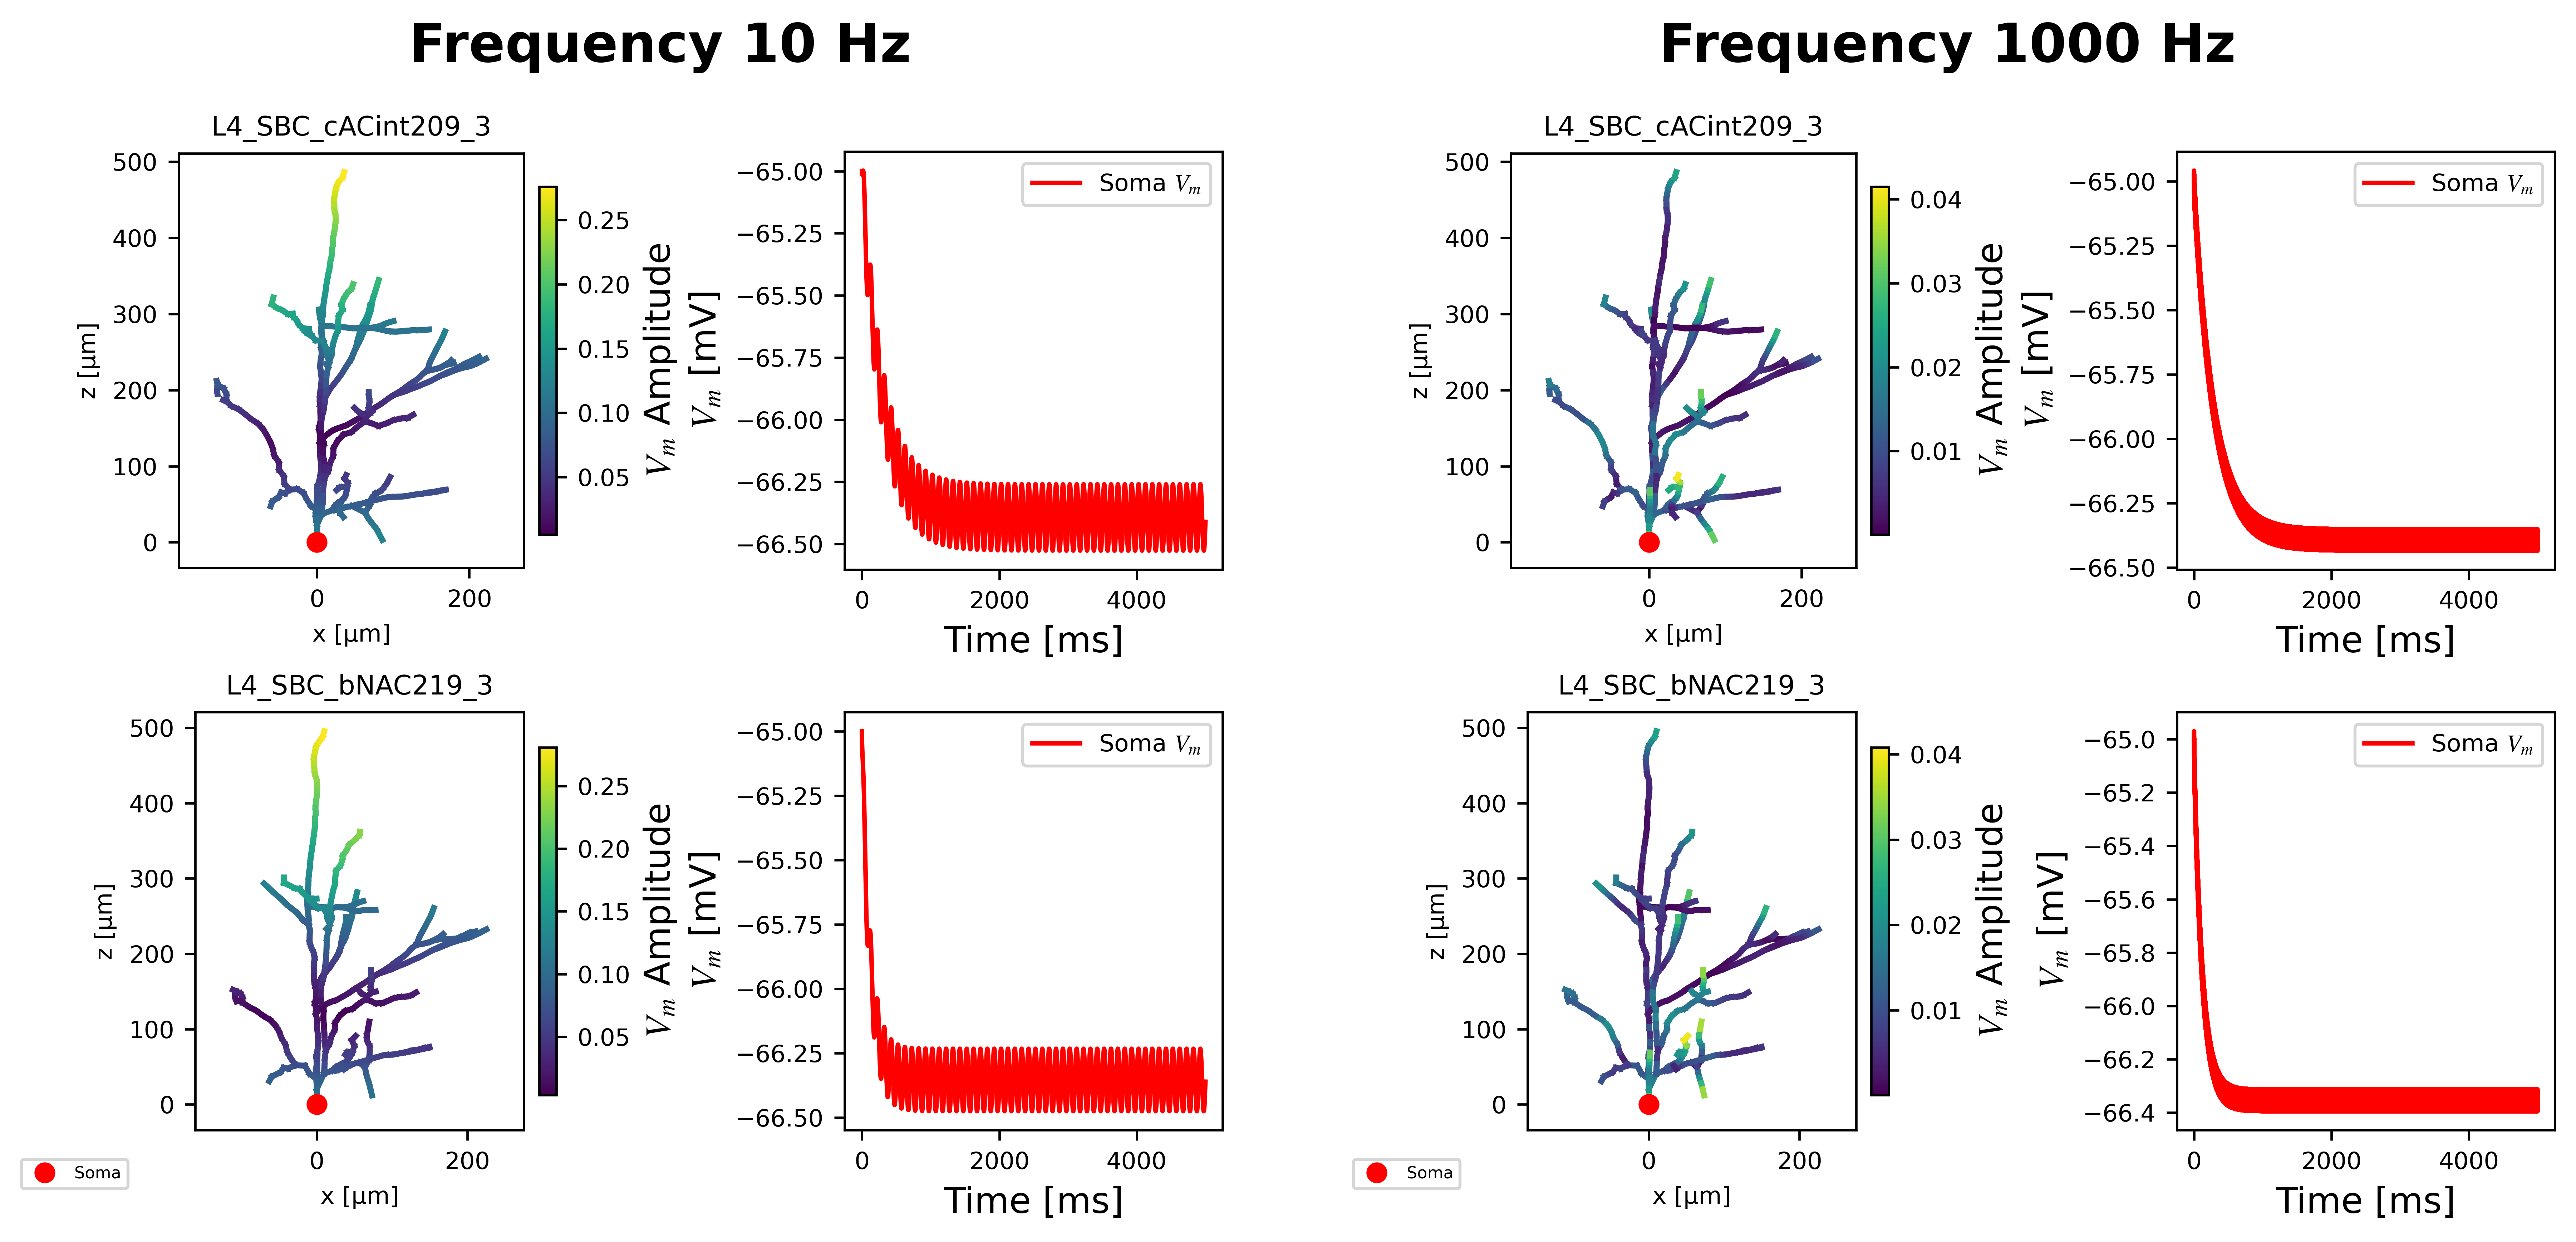

In [8]:
plot_cell_shape_and_vmem(plot_vmem_file_paths, selected_cells=sorted_all_neurons_highest_soma_amp_1000Hz[0:2], selected_frequencies = [10,1000]) 